In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('dataset-tickets-multi-lang.csv')
df.head()

,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,Problema crítico del servidor requiere atenció...,Es necesaria una investigación inmediata sobre...,Estamos investigando urgentemente el problema ...,Incident,Technical Support,high,es,IT Services,Urgent Issue,Service Disruption,Incident Report,Service Recovery,System Maintenance,NaN,NaN,NaN,NaN
1,Anfrage zur Verfügbarkeit des Dell XPS 13 9310,"Sehr geehrter Kundenservice,\n\nich hoffe, die...","Sehr geehrter <name>,\n\nvielen Dank, dass Sie...",Request,Customer Service,low,de,Tech Online Store,Sales Inquiry,Product Support,Customer Service,Order Issue,Returns and Exchanges,NaN,NaN,NaN,NaN
2,Erro na Autocompletação de Código do IntelliJ ...,"Prezado Suporte ao Cliente <name>,\n\nEstou es...","Prezado <name>,\n\nObrigado por entrar em cont...",Incident,Technical Support,high,pt,IT Services,Technical Support,Software Bug,Problem Resolution,Urgent Issue,IT Support,NaN,NaN,NaN,NaN
3,Urgent Assistance Required: AWS Service,"Dear IT Services Support Team, \n\nI am reachi...","Dear <name>,\n\nThank you for reaching out reg...",Request,IT Support,high,en,IT Services,IT Support,Urgent Issue,Service Notification,Cloud Services,Problem Resolution,Technical Guidance,Performance Tuning,NaN,NaN
4,Problème d'affichage de MacBook Air,Cher équipe de support du magasin en ligne Tec...,"Cher <name>,\n\nMerci de nous avoir contactés ...",Incident,Product Support,low,fr,Tech Online Store,Technical Support,Product Support,Hardware Failure,Service Recovery,Routine Request,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3063 entries, 0 to 3062
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject        2713 non-null   object 
 1   body           3061 non-null   object 
 2   answer         3062 non-null   object 
 3   type           3062 non-null   object 
 4   queue          3062 non-null   object 
 5   priority       3062 non-null   object 
 6   language       3062 non-null   object 
 7   business_type  3062 non-null   object 
 8   tag_1          3062 non-null   object 
 9   tag_2          3062 non-null   object 
 10  tag_3          3062 non-null   object 
 11  tag_4          3061 non-null   object 
 12  tag_5          2556 non-null   object 
 13  tag_6          1667 non-null   object 
 14  tag_7          781 non-null    object 
 15  tag_8          200 non-null    object 
 16  tag_9          0 non-null      float64
dtypes: float64(1), object(16)
memory usage: 406.9+ KB


In [9]:
df['language'].value_counts()

,count
language,
en,1121
de,636
es,600
fr,361
pt,344


In [10]:
# Creating tf-idf vectors
from sklearn.feature_extraction.text import TfidfVectorizer


def create_tfidf_for_answers(df):
    """
    Creates TF-IDF vectors for the 'answer' column in a DataFrame.
    """

    vectorizer = TfidfVectorizer()  # Initialize the TF-IDF vectorizer

    # Fit and transform the 'answer' column
    tfidf_matrix = vectorizer.fit_transform(df['answer'].astype(str))

    # Get the feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    # Create a DataFrame from the TF-IDF matrix
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

    return tfidf_df

# Example Usage
tfidf_answers = create_tfidf_for_answers(df)
tfidf_answers.head()

,000,05,0x80300024,10,100,102,10e,10ème,11,11th,...,überwachen,überwachung,überwachungsdaten,überwachungsfunktionen,überwachungswerkzeuge,überwinden,überzahlung,üblichen,œil,œuvre
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


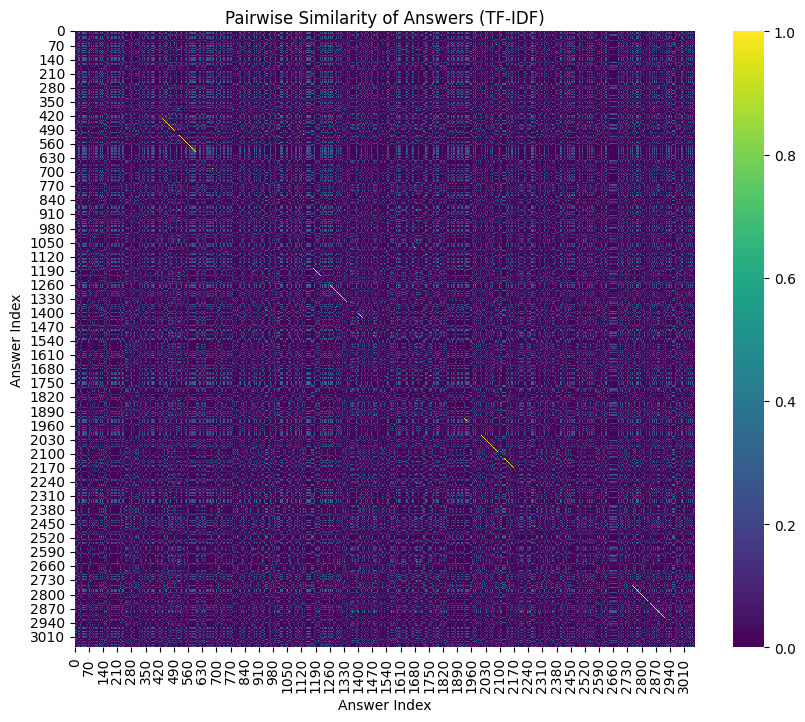

In [11]:
# calculate pairwise similarity for every row and make a heatmap of same

from sklearn.metrics.pairwise import cosine_similarity

# Calculate pairwise similarity
similarity_matrix = cosine_similarity(tfidf_answers)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=False, cmap='viridis') # annot=True to show values
plt.title('Pairwise Similarity of Answers (TF-IDF)')
plt.xlabel('Answer Index')
plt.ylabel('Answer Index')
plt.show()

In [13]:
# use pca on 'tfidf_answers' and get top 3 pca Principal Components

from sklearn.decomposition import PCA

pca = PCA(n_components=3)  # Initialize PCA with 3 components
pca_result = pca.fit_transform(tfidf_answers)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

pca_df.head()

,PC1,PC2,PC3
0,-0.197812,-0.143557,-0.107158
1,-0.113697,0.291983,-0.007758
2,-0.211027,-0.146065,-0.139465
3,0.412139,-0.048210,-0.011644
4,-0.259331,-0.198481,0.552037


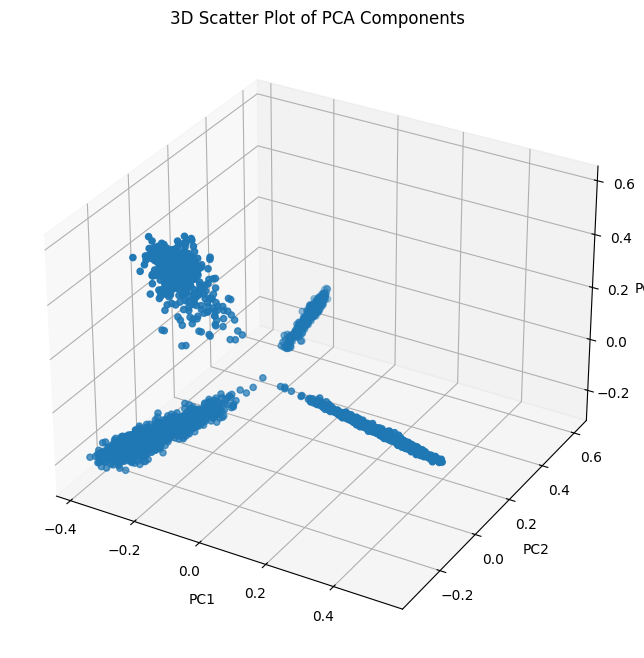

In [15]:
# make a 3d scatter plot for pca1, pca2 and pca3 using sns

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot of PCA Components')

plt.show()

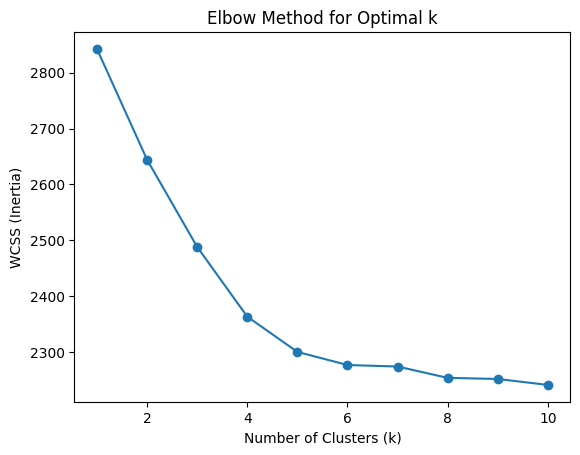

In [18]:
# Applying k means
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming tfidf_answers is your TF-IDF matrix or pca_df is your PCA transformed data

# Elbow method to find optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):  # Try different cluster numbers (1 to 10)
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(tfidf_answers)  # Fit KMeans to the data
    wcss.append(kmeans.inertia_)  # Append the inertia to the list

# Plot the elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.show()

In [19]:
# Applying the k-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(tfidf_answers)

KMeans(n_clusters=5, random_state=42)

In [20]:
# Assigning the cluster labels in dataframe
df["answer_label"] = kmeans.labels_

In [21]:
df.head()

,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,answer_label
0,Problema crítico del servidor requiere atenció...,Es necesaria una investigación inmediata sobre...,Estamos investigando urgentemente el problema ...,Incident,Technical Support,high,es,IT Services,Urgent Issue,Service Disruption,Incident Report,Service Recovery,System Maintenance,NaN,NaN,NaN,NaN,1
1,Anfrage zur Verfügbarkeit des Dell XPS 13 9310,"Sehr geehrter Kundenservice,\n\nich hoffe, die...","Sehr geehrter <name>,\n\nvielen Dank, dass Sie...",Request,Customer Service,low,de,Tech Online Store,Sales Inquiry,Product Support,Customer Service,Order Issue,Returns and Exchanges,NaN,NaN,NaN,NaN,4
2,Erro na Autocompletação de Código do IntelliJ ...,"Prezado Suporte ao Cliente <name>,\n\nEstou es...","Prezado <name>,\n\nObrigado por entrar em cont...",Incident,Technical Support,high,pt,IT Services,Technical Support,Software Bug,Problem Resolution,Urgent Issue,IT Support,NaN,NaN,NaN,NaN,3
3,Urgent Assistance Required: AWS Service,"Dear IT Services Support Team, \n\nI am reachi...","Dear <name>,\n\nThank you for reaching out reg...",Request,IT Support,high,en,IT Services,IT Support,Urgent Issue,Service Notification,Cloud Services,Problem Resolution,Technical Guidance,Performance Tuning,NaN,NaN,0
4,Problème d'affichage de MacBook Air,Cher équipe de support du magasin en ligne Tec...,"Cher <name>,\n\nMerci de nous avoir contactés ...",Incident,Product Support,low,fr,Tech Online Store,Technical Support,Product Support,Hardware Failure,Service Recovery,Routine Request,NaN,NaN,NaN,NaN,2
